<a href="https://colab.research.google.com/github/saahilahujaa/Cardiovascular-Risk/blob/main/Cardiovascular_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Data_path = "/content/drive/MyDrive/Alma Better/Capstone Projects/Capstone Project 3 - Cardiovascular Risk/"


# Importing TED Talks Data File.
Risk_df = pd.read_csv(Data_path + "data_cardiovascular_risk.csv")

In [ ]:
Risk_df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [ ]:
Risk_df.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [ ]:
df = Risk_df.dropna(how = "any")
df.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df["TenYearCHD"].value_counts()

0    2483
1     444
Name: TenYearCHD, dtype: int64

In [ ]:
df["sex"].value_counts()

F    1620
M    1307
Name: sex, dtype: int64

In [ ]:
Risk_df["is_smoking"].value_counts()

NO     1703
YES    1687
Name: is_smoking, dtype: int64

In [ ]:
df[df.duplicated()]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [ ]:
df["diabetes"].value_counts()

0    2848
1      79
Name: diabetes, dtype: int64

In [ ]:
df['sex'] = df['sex'].map(
                   {'M':1 ,'F': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df['is_smoking'] = df['is_smoking'].map(
                   {'YES':1 ,'NO': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df.drop(['id'], axis=1)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,61,3.0,0,0,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,0,0,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1


## EDA

In [ ]:
categorical_features = [i for i in df.columns if df[i].nunique()<=4]
numeric_features = [i for i in df.columns if i not in categorical_features]

print(categorical_features)
print(numeric_features)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['id', 'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

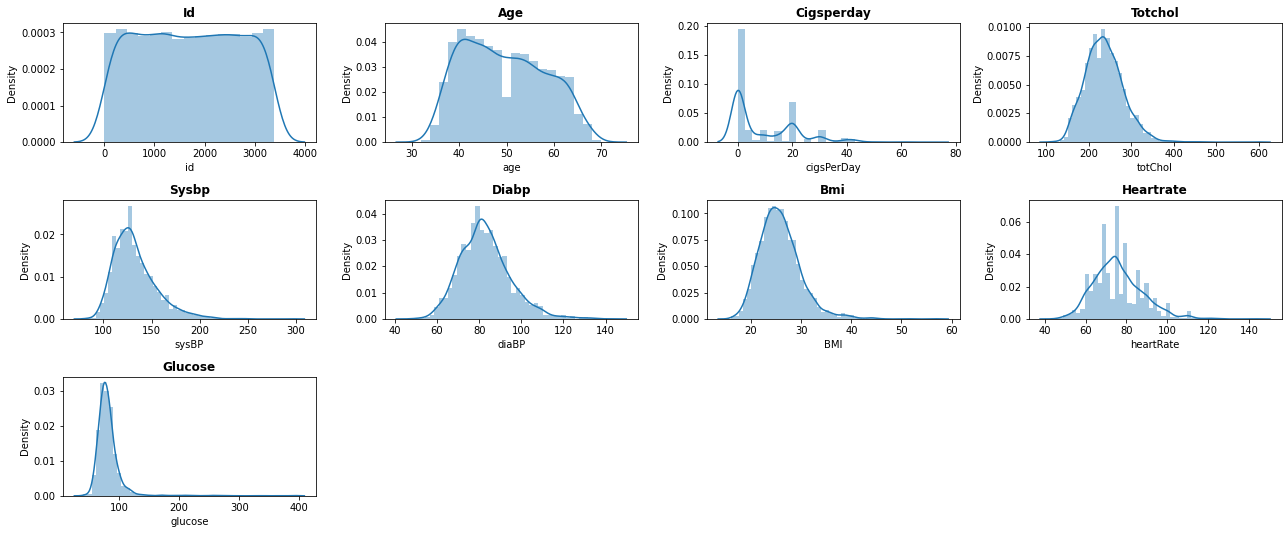

In [ ]:
# Visualizing the distributions.
plt.figure(figsize=(18,12))
for i, column in enumerate(numeric_features):
  plt.subplot(5, 4, i+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

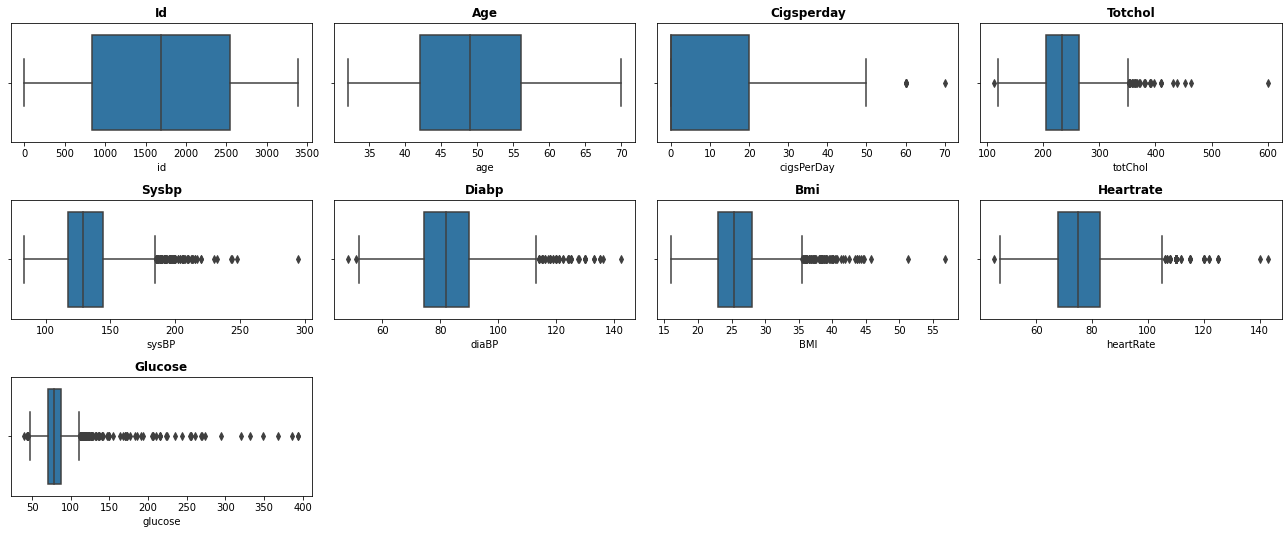

In [ ]:
plt.figure(figsize=(18,12))
for i,column in enumerate(numeric_features):
  plt.subplot(5, 4, i+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

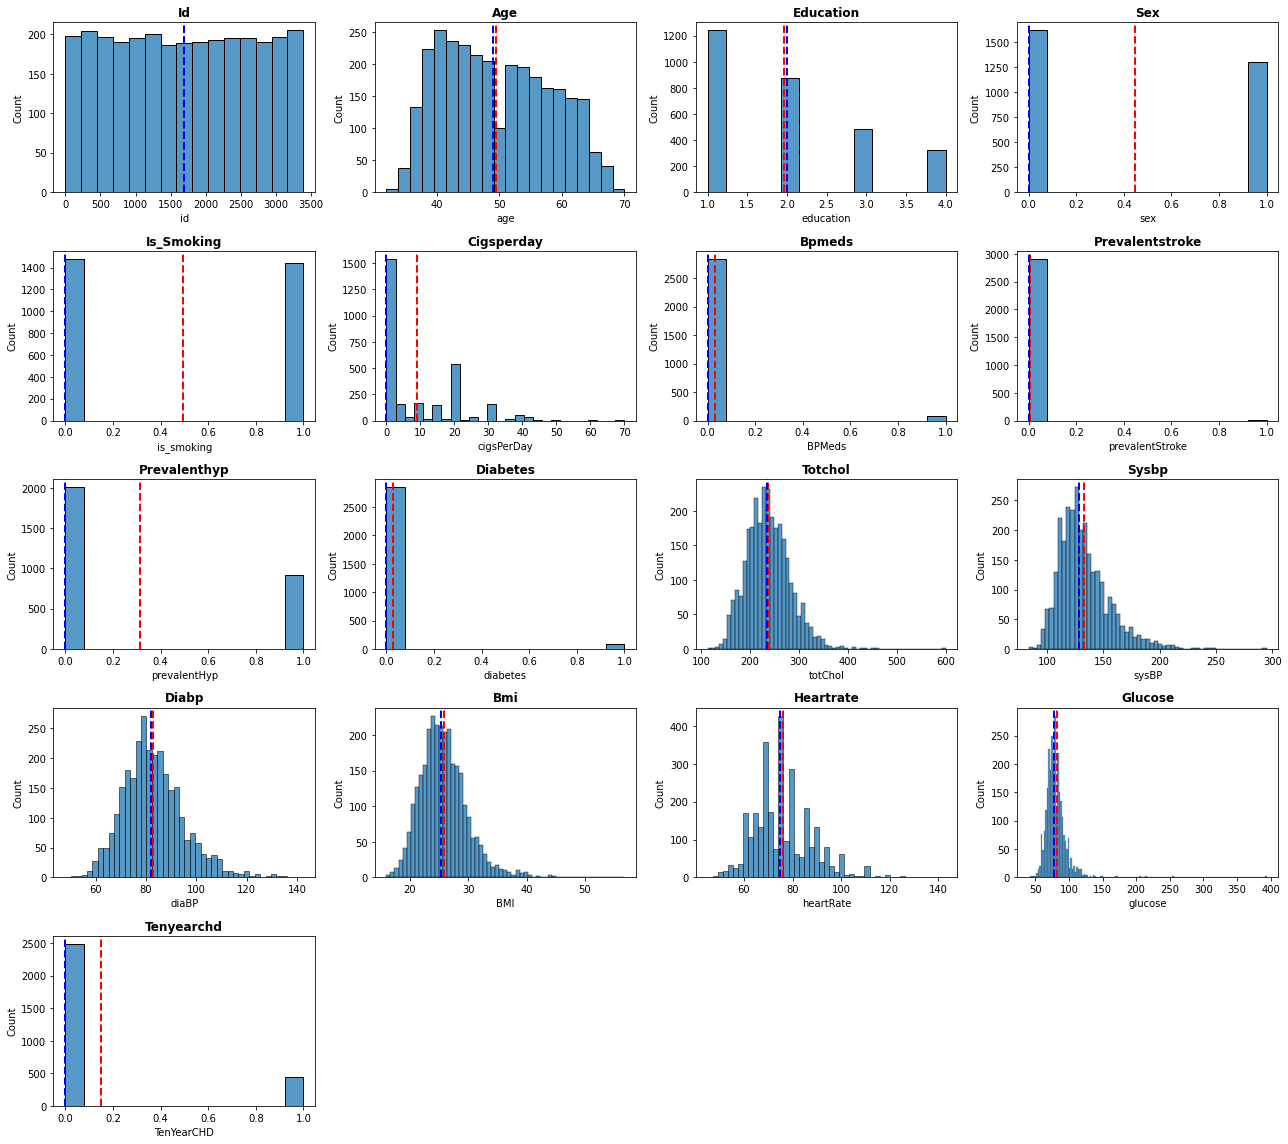

In [ ]:
# Visualizing the mean and median.
plt.figure(figsize=(18,16))
for i, column in enumerate(df.columns):
  feature = df[column]
  ax=plt.subplot(5, 4, i+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

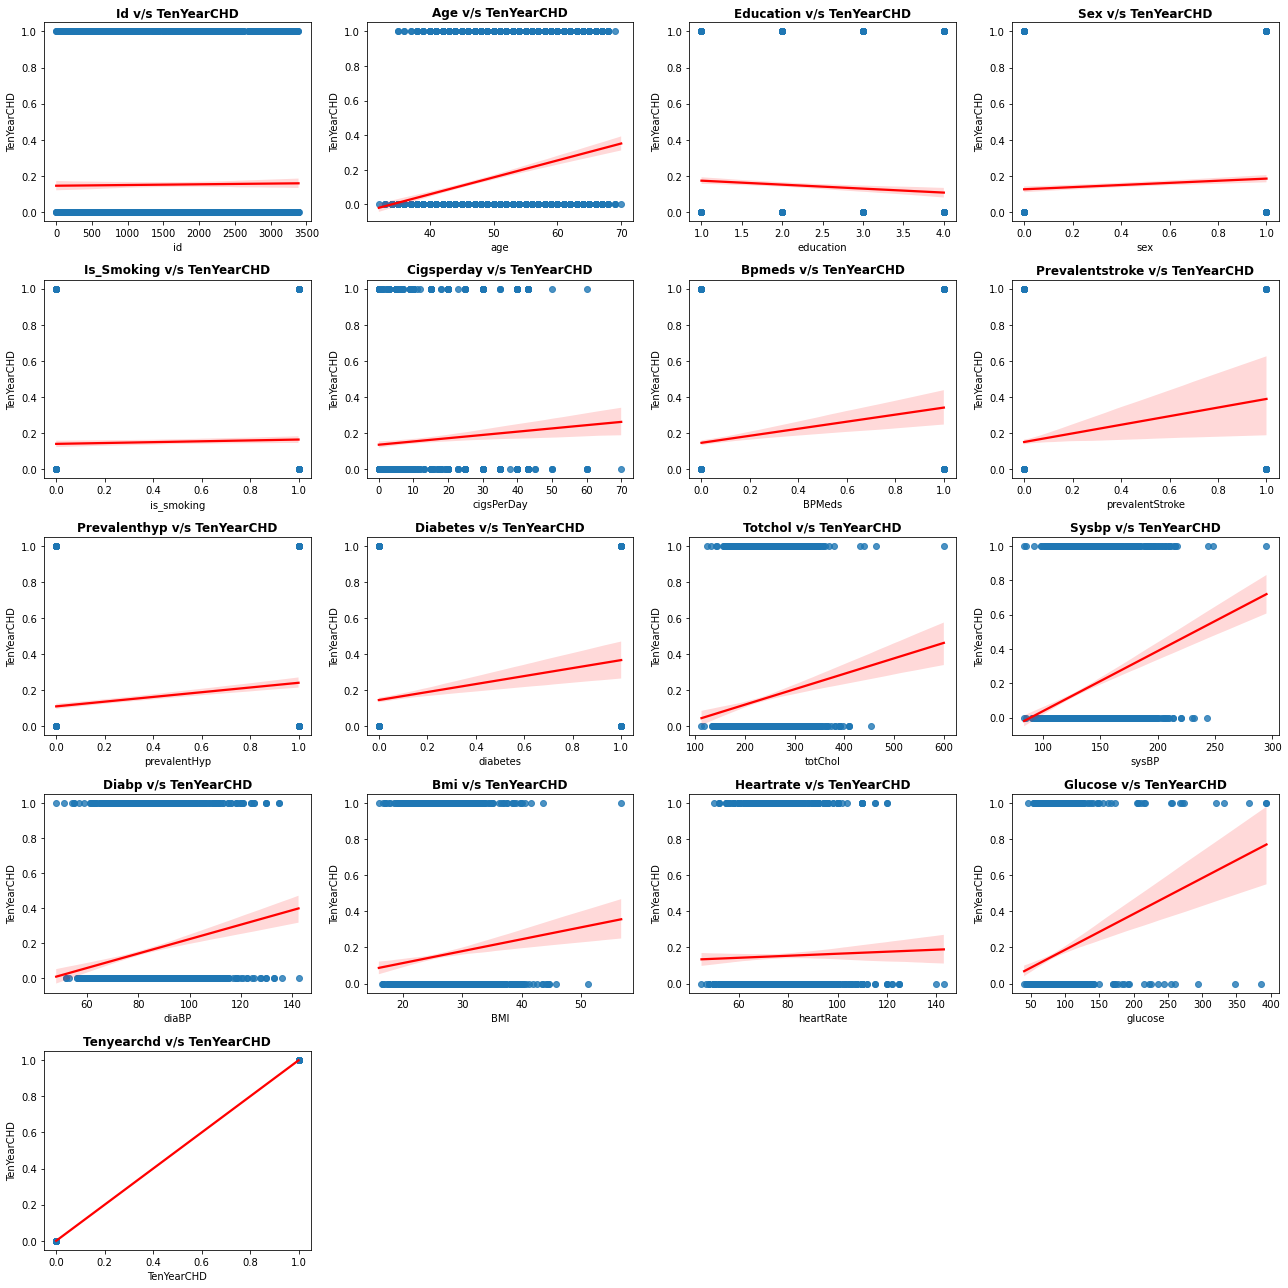

In [ ]:
# Checking Linearity
independent_variables = [i for i in df.columns if i not in ['id', 'TenYearCHD']]

plt.figure(figsize=(18,18))
for n, column in enumerate(df.columns ):
  plt.subplot(5, 4, n+1)
  sns.regplot(x = df[column], y =df['TenYearCHD'],line_kws={"color": "red"})
  plt.title(f'{column.title()} v/s TenYearCHD',weight='bold')
  plt.tight_layout()

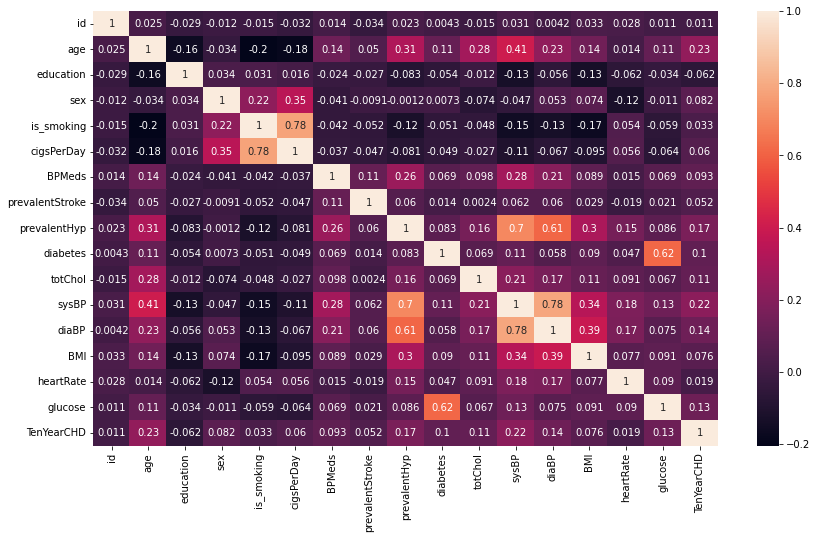

In [ ]:
correlmap = df.corr()
f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(correlmap, annot=True, ax = ax)

## Model Building

### Prerequisites

In [ ]:
X = df.drop('TenYearCHD',axis=1).values
y = df['TenYearCHD'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0, stratify=y)

In [ ]:
pd.DataFrame(y_train).value_counts()

0    1986
1     355
dtype: int64

In [ ]:
pd.DataFrame(y_test).value_counts()

0    497
1     89
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
scaler_range = MinMaxScaler()
scaler_range.fit(X_train)

MinMaxScaler()

In [ ]:
df_train_scaled = pd.DataFrame(scaler_range.transform(X_train))
df_test_scaled = pd.DataFrame(scaler_range.transform(X_test))

In [ ]:
from imblearn.combine import SMOTETomek
X_smote, y_smote = SMOTETomek(random_state=42).fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

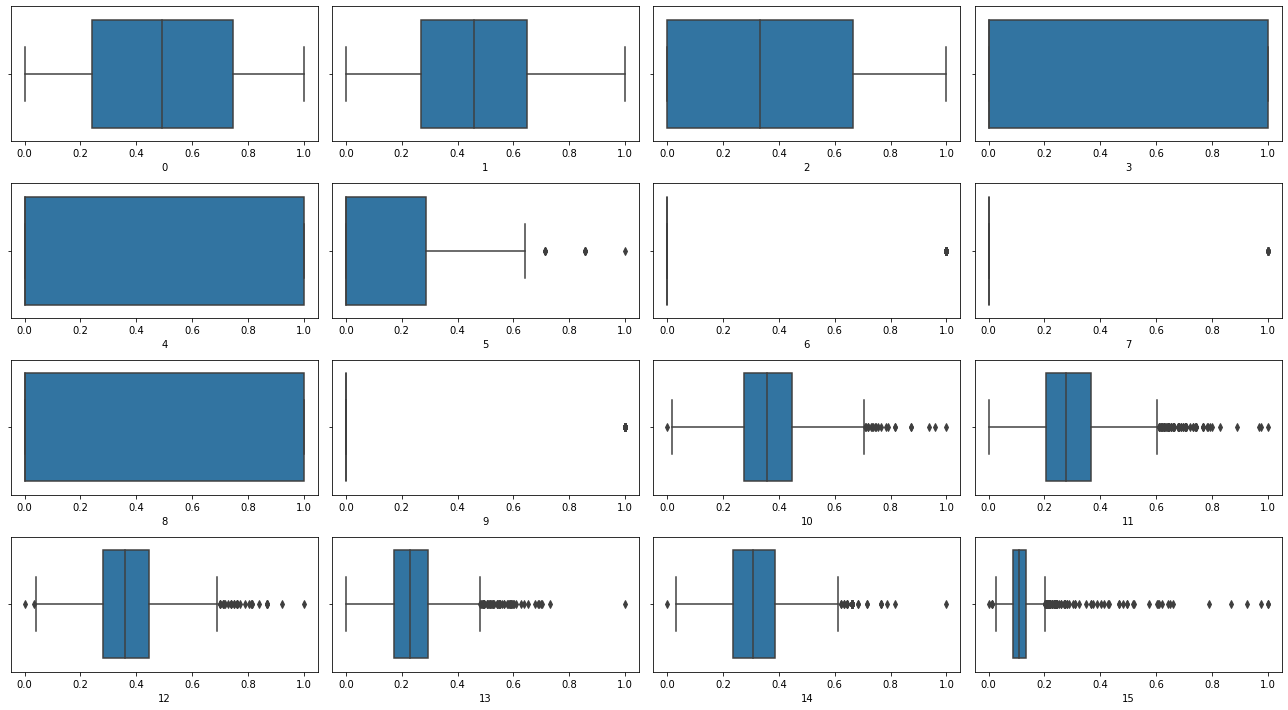

In [ ]:
plt.figure(figsize=(18,12))
for i,column in enumerate(pd.DataFrame(df_train_scaled)):
  plt.subplot(5, 4, i+1)
  sns.boxplot(pd.DataFrame(df_train_scaled)[column])
  # plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

## KNN

In [ ]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_smote, y_smote)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_smote, y_smote)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

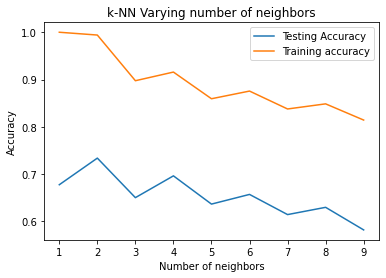

In [ ]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
# Fit the model
knn.fit(X_smote,y_smote)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.score(X_test,y_test)

0.7337883959044369

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [ ]:
# Let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[405,  92],
       [ 64,  25]])

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

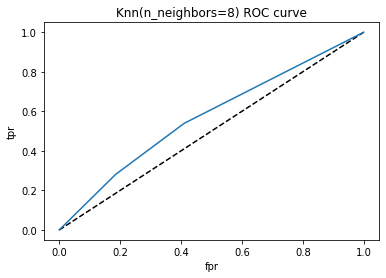

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=8) ROC curve')
plt.show()

In [ ]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.5721633169805349

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
knn_cv.best_score_

0.8486508561593885

In [ ]:
knn_cv.best_params_

{'n_neighbors': 31}

## Naive Bayes

In [ ]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_smote, y_smote)
 
# making predictions on the testing set
y_test_pred = gnb.predict(X_test)
y_train_pred = gnb.predict(X_smote)



In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train_pred,y_smote))
print(accuracy_score(y_test_pred,y_test))

0.6169500257599175
0.8122866894197952


In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[435,  62],
       [ 48,  41]])

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(df_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(df_train_scaled)
test_preds = clf.predict_proba(df_test_scaled)

In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(df_train_scaled)
test_class_preds = clf.predict(df_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8543357539513029
The accuracy on test data is  0.8532423208191127


In [ ]:
confusion_matrix(y_test,test_class_preds)

array([[495,   2],
       [ 84,   5]])

## SVM

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
svmc = svm.SVC(kernel='poly') # Polynomial Kernel

#Train the model using the training sets
svmc.fit(df_train_scaled, y_train)

#Predict the response for test dataset
y_pred = svmc.predict(df_test_scaled)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
svmc.score(df_test_scaled,y_test)


0.8515358361774744

## XGB Classifier

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_smote, y_smote)
print(); print(model)


XGBClassifier()


In [ ]:
# making predictions on the testing set
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_smote)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train_pred,y_smote))
print(accuracy_score(y_test_pred,y_test))

0.9085522926326636
0.8447098976109215


In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[485,  12],
       [ 79,  10]])

## NN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# function to build the keras model
def create_model(a,b):
    # create model
   
    model = Sequential()
    model.add(Dense(a, input_dim=16, activation='sigmoid'))
    model.add(Dense(b, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    
    # compile model
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
 
    return model

In [ ]:
model = create_model(20,20)
model.fit(X_smote, y_smote, epochs=100, verbose=2)

Epoch 1/100
122/122 - 1s - loss: 0.6999 - accuracy: 0.4967 - 1s/epoch - 12ms/step
Epoch 2/100
122/122 - 0s - loss: 0.6920 - accuracy: 0.5129 - 266ms/epoch - 2ms/step
Epoch 3/100
122/122 - 0s - loss: 0.6906 - accuracy: 0.5312 - 254ms/epoch - 2ms/step
Epoch 4/100
122/122 - 0s - loss: 0.6913 - accuracy: 0.5196 - 251ms/epoch - 2ms/step
Epoch 5/100
122/122 - 0s - loss: 0.6906 - accuracy: 0.5291 - 250ms/epoch - 2ms/step
Epoch 6/100
122/122 - 0s - loss: 0.6903 - accuracy: 0.5229 - 268ms/epoch - 2ms/step
Epoch 7/100
122/122 - 0s - loss: 0.6892 - accuracy: 0.5397 - 179ms/epoch - 1ms/step
Epoch 8/100
122/122 - 0s - loss: 0.6890 - accuracy: 0.5332 - 166ms/epoch - 1ms/step
Epoch 9/100
122/122 - 0s - loss: 0.6886 - accuracy: 0.5435 - 179ms/epoch - 1ms/step
Epoch 10/100
122/122 - 0s - loss: 0.6883 - accuracy: 0.5345 - 171ms/epoch - 1ms/step
Epoch 11/100
122/122 - 0s - loss: 0.6854 - accuracy: 0.5587 - 180ms/epoch - 1ms/step
Epoch 12/100
122/122 - 0s - loss: 0.6831 - accuracy: 0.5562 - 174ms/epoch - 

In [ ]:
model.summary()
score_train = model.evaluate(X_smote, y_smote, verbose=1)
score_test = model.evaluate(X_test, y_test, verbose=1)
print('Model Accuracy(train) = ',score_train[1])
print('Model Accuracy(test) = ',score_test[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                340       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 781
Trainable params: 781
Non-trainable params: 0
_________________________________________________________________
19/19 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.5785
Model Accuracy(train) =  0.6875321865081787
Model Accuracy(test) =  0.5784983038902283
